In [1]:
import urllib.parse, http.client, urllib.request, urllib.error, json

textAnalyticsEndpoint = "aml-text-learn.cognitiveservices.azure.com"
textAnalyticsAPI = "/text/analytics/v2.0/sentiment"
textAnalyticsKey = "1009e403fa1a4fac942b55d99a037c8c"
httpMethod = "POST"

In [2]:
!curl https://www.unisi.it/sites/default/files/speech.txt -o speech.txt
document = open("speech.txt", "r")
mlk_speech = document.read()
print(mlk_speech)

And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream.
 
I have a dream that one day this nation will rise up and live out the true meaning of its creed:
 
We hold these truths to be self-evident, that all men are created equal.
 
I have a dream that one day on the red hills of Georgia, the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood.
 
I have a dream that one day even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of oppression, will be transformed into an oasis of freedom and justice.
 
I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character.
 
I have a dream today!
 
I have a dream that one day, down in Alabama, with its vicious racists, with its governor having h

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  3349  100  3349    0     0   1193      0  0:00:02  0:00:02 --:--:--  1193


In [3]:
#Remove numbers
mlk_speech = ''.join(x for x in mlk_speech if not x.isdigit())
print(mlk_speech)

And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream.
 
I have a dream that one day this nation will rise up and live out the true meaning of its creed:
 
We hold these truths to be self-evident, that all men are created equal.
 
I have a dream that one day on the red hills of Georgia, the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood.
 
I have a dream that one day even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of oppression, will be transformed into an oasis of freedom and justice.
 
I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character.
 
I have a dream today!
 
I have a dream that one day, down in Alabama, with its vicious racists, with its governor having h

In [5]:
#Remove puncation
from string import punctuation
mlk_speech = ''.join(x for x in mlk_speech if x not in punctuation)
print(mlk_speech)

And so even though we face the difficulties of today and tomorrow I still have a dream It is a dream deeply rooted in the American dream
 
I have a dream that one day this nation will rise up and live out the true meaning of its creed
 
We hold these truths to be selfevident that all men are created equal
 
I have a dream that one day on the red hills of Georgia the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood
 
I have a dream that one day even the state of Mississippi a state sweltering with the heat of injustice sweltering with the heat of oppression will be transformed into an oasis of freedom and justice
 
I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character
 
I have a dream today
 
I have a dream that one day down in Alabama with its vicious racists with its governor having his lips dripping w

In [6]:
#Remove stop words [a, of, the]
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

mlk_speech = ' '.join(word for word in mlk_speech.split() if word not in (stopwords.words('english')))
print(mlk_speech)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pppri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
And even though face difficulties today tomorrow I still dream It dream deeply rooted American dream I dream one day nation rise live true meaning creed We hold truths selfevident men created equal I dream one day red hills Georgia sons former slaves sons former slave owners able sit together table brotherhood I dream one day even state Mississippi state sweltering heat injustice sweltering heat oppression transformed oasis freedom justice I dream four little children one day live nation judged color skin content character I dream today I dream one day Alabama vicious racists governor lips dripping words interposition nullification one day right Alabama little black boys black girls able join hands little white boys white girls sisters brothers I dream today I dream one day every valley shall exalted every hill mountain shall made low r

In [7]:
#Tokensing
nltk.download('punkt')
T_words = nltk.tokenize.word_tokenize(mlk_speech)
print(T_words)

#Steaming
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stems = [ps.stem(word) for word in T_words]
print(stems)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pppri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
['And', 'even', 'though', 'face', 'difficulties', 'today', 'tomorrow', 'I', 'still', 'dream', 'It', 'dream', 'deeply', 'rooted', 'American', 'dream', 'I', 'dream', 'one', 'day', 'nation', 'rise', 'live', 'true', 'meaning', 'creed', 'We', 'hold', 'truths', 'selfevident', 'men', 'created', 'equal', 'I', 'dream', 'one', 'day', 'red', 'hills', 'Georgia', 'sons', 'former', 'slaves', 'sons', 'former', 'slave', 'owners', 'able', 'sit', 'together', 'table', 'brotherhood', 'I', 'dream', 'one', 'day', 'even', 'state', 'Mississippi', 'state', 'sweltering', 'heat', 'injustice', 'sweltering', 'heat', 'oppression', 'transformed', 'oasis', 'freedom', 'justice', 'I', 'dream', 'four', 'little', 'children', 'one', 'day', 'live', 'nation', 'judged', 'color', 'skin', 'content', 'character', 'I', 'dream', 'today', 'I', 'dream', 'one', 'day', 'Alabama', 'vicious'

In [8]:
from nltk.probability import FreqDist
import pandas as pd


fd = FreqDist(stems)
fd_dt = pd.DataFrame(fd,index=[0]).T
print(fd_dt)


               0
and            5
even           2
though         1
face           1
difficulti     1
today          3
tomorrow       1
I             11
still          1
dream         11
It             1
deepli         1
root           1
american       1
one            8
day           11
nation         4
rise           1
live           2
true           2
mean           2
creed          1
We             1
hold           1
truth          1
selfevid       1
men            3
creat          1
equal          1
red            1
...           ..
york           1
heighten       1
allegheni      1
pennsylvania   1
snowcap        1
rocki          1
colorado       1
curvac         1
slope          1
california     1
but            1
lookout        1
tennesse       1
molehil        1
happen         1
allow          1
villag         1
hamlet         1
citi           1
speed          1
jew            1
gentil         1
protest        1
cathol         1
old            1
negro          1
spiritu       

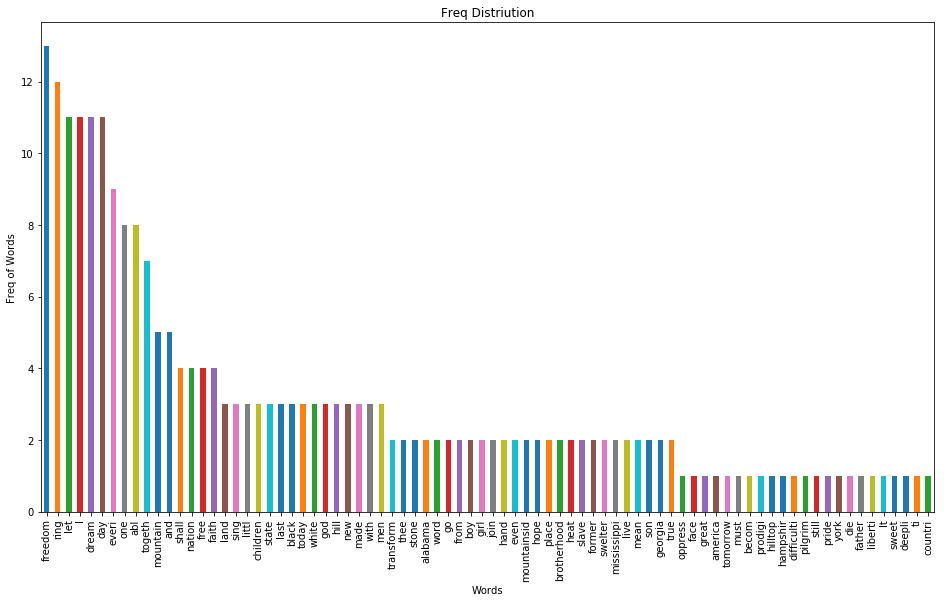

In [10]:
#plotting on graph 
import matplotlib.pyplot as plt
counts  = fd_dt.sort_values(0,ascending=False)

ar = plt.figure(figsize=(16,9))
ax = ar.gca()
counts[0][:80].plot(kind='bar',ax=ax)
ax.set_title("Freq Distriution")
ax.set_xlabel("Words")
ax.set_ylabel("Freq of Words")
plt.show()